In [19]:
!pip freeze

graphviz==0.20.3
joblib==1.4.2
numpy==2.1.2
pydot==3.0.2
pyparsing==3.2.0
scikit-learn==1.5.2
scipy==1.14.1
threadpoolctl==3.5.0


In [20]:
!python -V

Python 3.12.0


In [21]:
%%time
# imports
import os
import time
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
%%time
# read in data and preprocess
images_path = './data/archive/asl_alphabet_train/asl_alphabet_train/'
images = []

for directory in os.listdir(images_path):
    for file in os.listdir(images_path+directory):
        file_path = images_path+directory+'/'+file
        image = Image.open(file_path)
        image = image.convert('L') # convert to grayscale
        image = image.resize((128, 128)) # resize
        # image.save('./data/resized/'+file) # uncomment to save the resized image
        image = np.array(image) # convert to array
        image = image / 255.0 # normalize
        images.append((directory, image))

x = [image[1] for image in images]
y = [image[0] for image in images]

CPU times: total: 6min 46s
Wall time: 18min 38s


In [23]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = np.array(x_train)
x_test = np.array(x_test)


# binarize the labels
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(69600, 128, 128)
(69600, 29)
(17400, 128, 128)
(17400, 29)
CPU times: total: 1min 17s
Wall time: 2min 12s


In [24]:
%%time
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(29, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

C:\Users\calif\Desktop\DataMining\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 268s 594ms/step - accuracy: 0.2048 - loss: 2.7391 - val_accuracy: 0.7377 - val_loss: 1.0330
Epoch 2/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 171s 392ms/step - accuracy: 0.5748 - loss: 1.2538 - val_accuracy: 0.8740 - val_loss: 0.5384
Epoch 3/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 152s 348ms/step - accuracy: 0.6911 - loss: 0.8773 - val_accuracy: 0.9022 - val_loss: 0.3599
Epoch 4/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 153s 352ms/step - accuracy: 0.7512 - loss: 0.6902 - val_accuracy: 0.9369 - val_loss: 0.2657
Epoch 5/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 153s 352ms/step - accuracy: 0.7830 - loss: 0.5949 - val_accuracy: 0.9466 - val_loss: 0.2170
Epoch 6/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 154s 354ms/step - accuracy: 0.8095 - loss: 0.5145 - val_accuracy: 0.9603 - val_loss: 0.1753
Epoch 7/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 153s 352ms/step - accuracy: 0.8315 - loss: 0.4622 - val_accuracy: 0.9635 - val_loss: 0.1544
Epoch 8/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 154s 353ms/step - accuracy: 0.8465 -

# Performance Graph

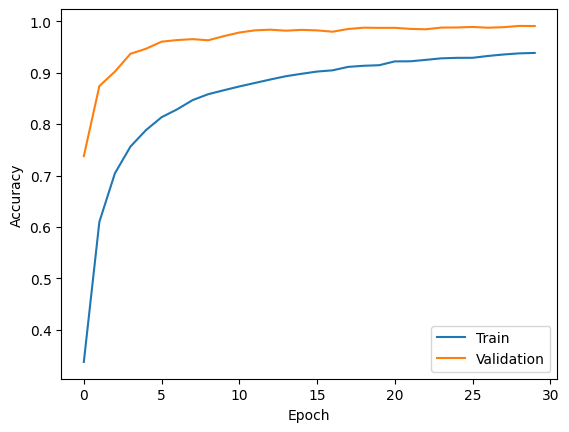

In [25]:
# plot model performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss and Accuracy measures

In [26]:
# print results of test data ran through model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(test_loss)
print(test_accuracy)

544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9915 - loss: 0.0347
0.034828051924705505
0.991436779499054


In [27]:
classes = { 0: "A",
            1: "B",
            2: "C",
            3: "D",
            4: "del",
            5: "E",
            6: "F",
            7: "G",
            8: "H",
            9: "I",
            10: "J",
            11: "K",
            12: "L",
            13: "M",
            14: "N",
            15: "nothing",
            16: "O",
            17: "P",
            18: "Q",
            19: "R",
            20: "S",
            21: "space",
            22: "T",
            23: "U",
            24: "V",
            25: "W",
            26: "X",
            27: "Y",
            28: "Z",
            }

# Confusion Matrix

544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step


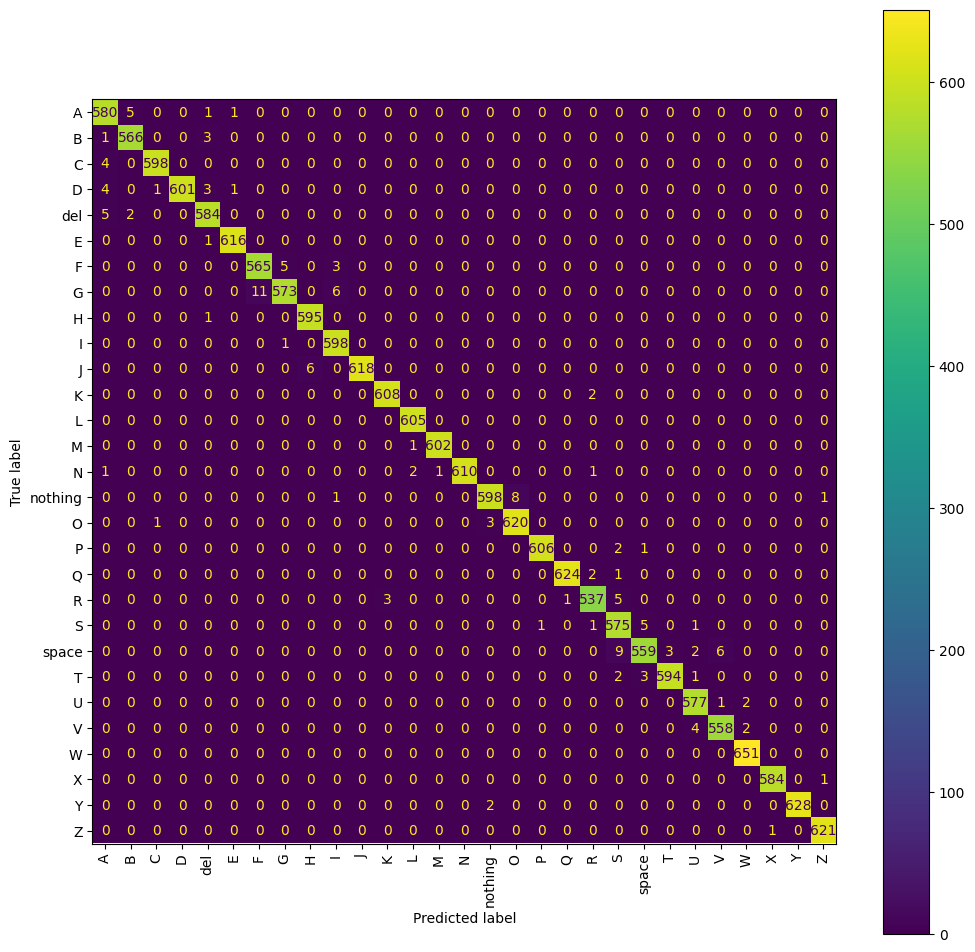

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.values())
disp.plot( values_format='d', ax=plt.gca())
plt.xticks(rotation=90)
plt.show()

# Classification Report

In [29]:
 print(classification_report(y_true, y_pred_classes, target_names= classes.values())) 

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       587
           B       0.99      0.99      0.99       570
           C       1.00      0.99      1.00       602
           D       1.00      0.99      0.99       610
         del       0.98      0.99      0.99       591
           E       1.00      1.00      1.00       617
           F       0.98      0.99      0.98       573
           G       0.99      0.97      0.98       590
           H       0.99      1.00      0.99       596
           I       0.98      1.00      0.99       599
           J       1.00      0.99      1.00       624
           K       1.00      1.00      1.00       610
           L       1.00      1.00      1.00       605
           M       1.00      1.00      1.00       603
           N       1.00      0.99      1.00       615
     nothing       0.99      0.98      0.99       608
           O       0.99      0.99      0.99       624
           P       1.00    

## If model seems good, save it with the following cell

In [30]:
# save model and lebal binarizer with date and time
from datetime import datetime
keras_model_save_name = './keras_saves/' + datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '.keras'
label_binarizer_save_name = './binarizer/' + datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '.pkl'
joblib.dump(label_binarizer, label_binarizer_save_name) # save label binarizer
model.save(keras_model_save_name) # save keras model

## The following cells are not needed for the research portion. They will only be used when we decide what model is best after research

In [31]:
model_name_to_export = 'Example'

In [32]:
# load trained model
from tensorflow.keras.models import load_model
load_name ='./keras_saves/' +  model_name_to_export + '.keras'
model = load_model(load_name, compile=False) 
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,293,741 (12.56 MB)

 Trainable params: 3,293,741 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
# export model
model.export('./model_exports/')

INFO:tensorflow:Assets written to: ./model_exports/assets


INFO:tensorflow:Assets written to: ./model_exports/assets


Saved artifact at './model_exports/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  2583349606544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2583349608080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2583349605200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2583349607312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2583349605776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2583349606736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2583349608272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2583349605968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2561383005456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2561383004112: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [34]:
# load exported model
import tensorflow as tf
reloaded_artifact = tf.saved_model.load('./model_exports/')
print(reloaded_artifact.signatures)


_SignatureMap({'serve': <ConcreteFunction (*, input_layer_1: TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')) -> Dict[['output_0', TensorSpec(shape=(None, 29), dtype=tf.float32, name='output_0')]] at 0x25E8FDF0C80>, 'serving_default': <ConcreteFunction (*, input_layer_1: TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')) -> Dict[['output_0', TensorSpec(shape=(None, 29), dtype=tf.float32, name='output_0')]] at 0x2597EA80E90>})


In [35]:
# prepocess test image
# test_img_path = './data/archive/asl_alphabet_test/asl_alphabet_test/L_test.jpg'
isThereImage = True
i = 1
while isThereImage == True:
    test_img_path = '..\camera_work\camera_work\capture\images\captured_image' + str(i) + '.jpg'
    
    if not os.path.exists(test_img_path):
        isThereImage = False
        
    og_image = Image.open(test_img_path)
    image = og_image.convert('L') # convert to grayscale
    image = image.resize((128, 128)) # resize
    image = np.array(image) # convert to array
    image = image / 255.0 # normalize
    image_array = np.expand_dims(image, axis=-1) 
    image_array = np.expand_dims(image_array, axis=0)   
        # predict test image
    predictions = reloaded_artifact.serve(image_array)
    rounded = np.round(predictions)
    b_load_name = './binarizer/' + model_name_to_export + '.pkl'
    label_binarizer = joblib.load(b_load_name) 
    original_label = label_binarizer.inverse_transform(rounded)
    print(original_label)
    i += 1


In [36]:
# predict test image
# predictions = reloaded_artifact.serve(image_array)
# rounded = np.round(predictions)
# b_load_name = './binarizer/' + model_name_to_export + '.pkl'
# label_binarizer = joblib.load(b_load_name) 
# original_label = label_binarizer.inverse_transform(rounded)
# print(original_label)

['O']
